<a href="https://colab.research.google.com/github/bharaniabhishek123/ML-Introduction/blob/main/Linear_Regression_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

## Linear Regression is an approach that tries to find a linear relationship between a dependent variable and an independent variable by minimizing the distance as shown below.
Linear Regression is a statistical method that allows us to summarize and study relationships between a target variable (also known as dependent variable) on one or more predictors (also known as independent variables).
The objective is to estimate and/or predict the mean value of the dependent variable (continuous) on the basis of the known values of the independent variables. And try to minimize the error as much as possible.

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

## Update the sklearn version to latest one on google colab; 

In [1]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0
Uninstalling scikit-learn-1.0:
  Successfully uninstalled scikit-learn-1.0
  Using cached scikit_learn-1.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.1 MB)


# Note: Please restart the runtime : Runtime >> Restart runtime and make sure we are on version 1.0 by executing below cell

In [2]:
import sklearn

sklearn.__version__ 

'1.0'

#1. Dataset 

In this exercise we will use UCI Diabetes Dataset, just to play around with Linear and Logistic regression models.

For each patient we have the body mass index(BMI) and a risk of diabetes (score from 0-300) 

Our goal is to find how BMI affects an individual's diabetes risk.

In [3]:
from sklearn import datasets 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

import matplotlib.pyplot as plt

import torch 
import torch.nn as nn 


# Load the dataset 
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# using only 1 feature bmi
X = X.loc[:, ['bmi']] 



## Split the dataset into training set and test test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
print(f'x_train.shape={X_train.shape} x_test.shape={X_test.shape} y_train.shape={y_train.shape} y_test.shape={y_test.shape}')

x_train.shape=(294, 1) x_test.shape=(148, 1) y_train.shape=(294,) y_test.shape=(148,)


In [5]:
# Display points
pd.concat([X_train, y_train], axis=1).head()

,bmi,target
193,-0.005128,116.0
109,-0.009439,81.0
195,0.025051,122.0
145,0.128521,259.0
210,0.014272,191.0


Text(0, 0.5, 'Diabetes Risk')

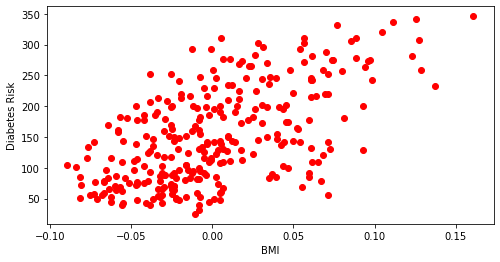

In [6]:


plt.rcParams['figure.figsize'] = [8,4]


plt.scatter(X_train, y_train, color='red')
plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")

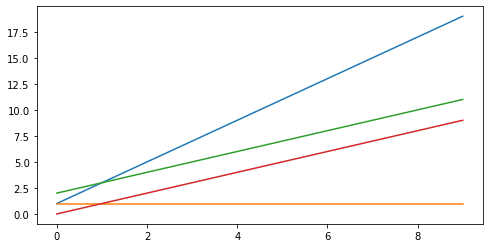

In [7]:
theta_list = [(1,2),(1,0),(2,1),(0,1)]
for theta0, theta1 in theta_list:
  x = np.arange(10)
  y = theta1 * x + theta0 
  plt.plot(x,y)

In [8]:
X_train = torch.from_numpy(X_train.to_numpy().astype(np.float32))
y_train = torch.from_numpy(y_train.to_numpy().astype(np.float32)) 
y_train = y_train.view(y_train.shape[0], 1)

In [9]:
n_samples, n_features = X_train.shape 
input_size = n_features 

In [10]:
output_size = 1

In [11]:
model = nn.Linear(input_size, out_features=output_size)

In [12]:
criterion = nn.MSELoss()

learning_rate = 0.03
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch : 0 , loss= 29214.751953125
epoch : 1000 , loss= 5540.93212890625
epoch : 2000 , loss= 5150.173828125
epoch : 3000 , loss= 4852.357421875
epoch : 4000 , loss= 4625.37646484375
epoch : 5000 , loss= 4452.3837890625
epoch : 6000 , loss= 4320.53759765625
epoch : 7000 , loss= 4220.05078125
epoch : 8000 , loss= 4143.46484375
epoch : 9000 , loss= 4085.09521484375
epoch : 10000 , loss= 4040.60888671875
epoch : 11000 , loss= 4006.7041015625
epoch : 12000 , loss= 3980.863037109375
epoch : 13000 , loss= 3961.168701171875
epoch : 14000 , loss= 3946.15869140625
epoch : 15000 , loss= 3934.718017578125
epoch : 16000 , loss= 3925.99951171875
epoch : 17000 , loss= 3919.3544921875
epoch : 18000 , loss= 3914.2900390625
epoch : 19000 , loss= 3910.429443359375
epoch : 20000 , loss= 3907.4873046875
epoch : 21000 , loss= 3905.245361328125
epoch : 22000 , loss= 3903.53662109375
epoch : 23000 , loss= 3902.23388671875
epoch : 24000 , loss= 3901.241455078125
epoch : 25000 , loss= 3900.485595703125
epoch : 

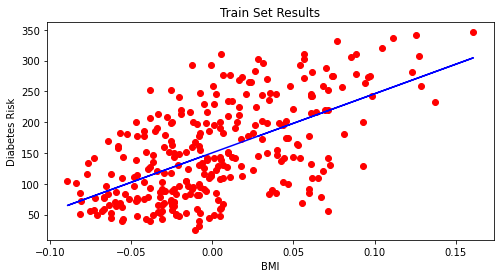

In [13]:
num_epochs = 30000
for epoch in range(num_epochs): 
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch) % 1000 == 0 :
    print("epoch : {} , loss= {}".format(epoch, loss.item()))

predicted = model(X_train).detach().numpy()
plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")
plt.plot(X_train, y_train, 'ro')
plt.plot(X_train,predicted, 'b')
plt.title("Train Set Results")
plt.show()


In [14]:
theta1 = model.weight.item()
theta0 = model.bias.item()
print("Slope (theta1): {}".format(theta1))
print("Bias (theta0) :{}".format(theta0))


Slope (theta1): 958.8073120117188
Bias (theta0) :150.2086944580078


In [15]:
y_test_pred = model(torch.from_numpy(X_test.to_numpy().astype('float32'))).data.numpy()
y_test_pred.shape

(148, 1)

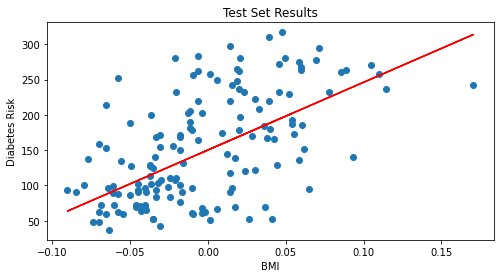

In [16]:
plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, color='red')
plt.title("Test Set Results")
plt.show()